In [ ]:
                                                         Perceptron 
                      Perceptron trick deep learning me ek fundamental concept hai jo machine
                     learning ke sabse basic algorithms me se ek ko samjhata hai. Isme hum ek
                     simple neural network ka use karte hain, jise "Perceptron" kehte hain, jo
                      single-layer hota hai aur binary classification problems solve karta hai.

In [ ]:
Perceptron Trick Kya Hai:-
Perceptron trick ka main idea ye hai ki jab aapko apna prediction galat milta hai (i.e. aapka model galat classify karta hai),

to aap apne weights ko update karte ho taaki future predictions accurate ho sakein. Weights ko is tareeke se update karte hain

ki error ko minimize kar sakein.

In [ ]:
Working of Perceptron Trick:
Input Features: Har input feature ke corresponding ek weight hota hai.

Weighted Sum: Sab input features ko unke corresponding weights ke saath multiply karte hain aur unka sum nikalte hain.

Activation Function: Is weighted sum ko ek activation function ke through pass karte hain, jo decision leta hai ki output kya hoga (0 ya 1).

Prediction and Error: Jab prediction galat hota hai, to error calculate kiya jaata hai.

In [ ]:
Try Perceptron trick on titanic dataset
load library

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
make Step Function (Activation Function)

In [2]:
def step_function(z):
    return 1 if z >= 0 else 0


In [ ]:
tep Function: Yeh binary activation function hai. Agar z >= 0 ho, to 1 return karta hai, otherwise 0. Iska kaam yeh hai ki perceptron ka decision 0 ya 1 mein convert kare.

Perceptron Training (Fit Method)
X: Input feature matrix (jaise Titanic data mein age, sex, fare, etc.).

y: Target labels (survived ya nahi, 0 or 1).

n_samples: Training examples ki total count.

n_features: Har example mein features ki count.

Weights Initialization: Weights ko zero se initialize kiya jata hai.

Bias Initialization: Bias ko 0 rakha gaya hai initially.

outer loop epochs ke liye chal raha hai (jitni baar model train hoga).

Har training example x_i ke liye:

Linear Output: Formula z = w * x + b use hota hai, yahan w weight hai aur b bias.

Step Function: Linear output ko step function ke through pass karke 0 ya 1 predict karte hain.

Update Rule: Agar prediction galat ho, to weights aur bias ko update karte hain:

update = learning_rate * (true_label - predicted_label)

Weights update hote hain: self.weights += update * x_i

Bias bhi update hota hai: self.bias += update

In [5]:
# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape  # Number of samples and features
        self.weights = np.zeros(n_features)  # Initialize weights as zeros
        self.bias = 0  # Initialize bias as zero

        # Training loop (epochs)
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Linear output (z = w * x + b)
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predicted output using step function
                y_predicted = step_function(linear_output)

                # Perceptron trick: weight and bias update
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [step_function(z) for z in linear_output]
        return np.array(y_predicted)

In [17]:

df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\titanic.csv")
df.head()
df = df[['Survived', 'Sex', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']]
df = df.dropna()
df.head()
l = LabelEncoder()
df["Sex"]= l.fit_transform(df["Sex"])

In [19]:
X = df.drop('Survived', axis=1).values    # .valuse ka matlab hai ki data numpy array mean convert ho jata hai
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
StandardScaler: Features ko scale karta hai taaki unka mean 0 aur standard deviation 1 ho. Yeh isliye kiya jata hai taaki model fast train ho aur sahi se converge kare.
fit_transform: Training data ke mean aur variance ko calculate karta hai aur phir data ko scale karta hai.

transform: Testing data ko same scale pe convert karta hai.

In [21]:
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)


In [22]:
y_pred_train = perceptron.predict(X_train)
y_pred_test = perceptron.predict(X_test)

train_accuracy = np.mean(y_pred_train == y_train) * 100
test_accuracy = np.mean(y_pred_test == y_test) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 100.00%
Test Accuracy: 100.00%


In [ ]:
Predict: Trained perceptron ko use karke training aur test data ka prediction kiya.

Accuracy Calculation: Predicted labels ko actual labels ke saath compare karke accuracy calculate ki:

np.mean(y_pred == y_actual) * 100: Correct predictions ka percentage nikalta hai.

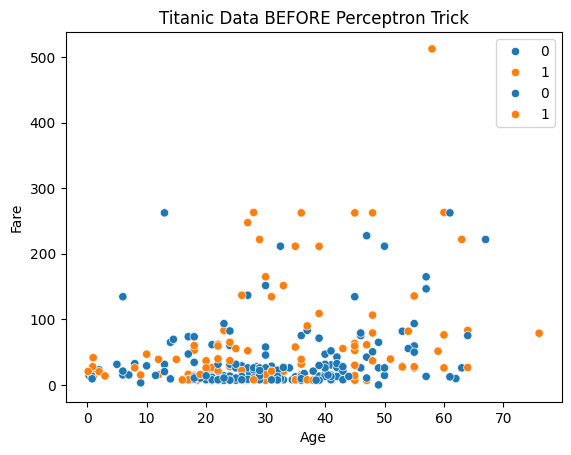

In [35]:
import matplotlib.pyplot as plt
df = df[['Age', 'Fare', 'Survived']].dropna()
plt.figure()

for label in [0, 1]:
    subset = df[df['Survived'] == label]      #subsets ka  use data groups karne ke liye karne ke liye kiya hai
   bplt.scatter(subset['Age'], subset['Fare'], label=f"Survived={label}")
   # sns.scatterplot(data =df,x='Age',y='Fare',hue='Survived') yei be tarika hai

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Titanic Data BEFORE Perceptron Trick")
plt.legend()
plt.show()


In [ ]:
Observation:
You cannot draw one straight line

Simple perceptron struggles

Apply Perceptron Trick (Feature Transformation)
Create a non-linear interaction feature

In [30]:
df['age_fare_interaction'] = df['Age'] * df['Fare']
#x3 = age × fare

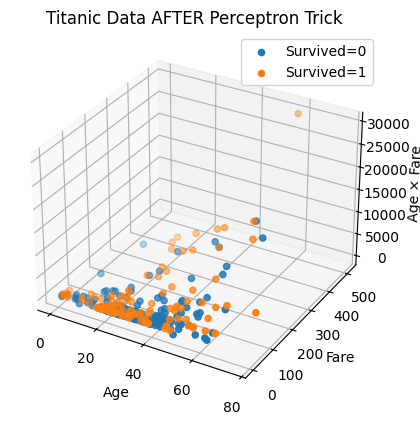

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in [0, 1]:
    subset = df[df['Survived'] == label]
    ax.scatter(
        subset['Age'],
        subset['Fare'],
        subset['age_fare_interaction'],
        label=f"Survived={label}"
    )

ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.set_zlabel("Age × Fare")
ax.set_title("Titanic Data AFTER Perceptron Trick")
ax.legend()
plt.show()


In [ ]:

Step	                                     Meaning
Raw Titanic data                       	    Non-linear
Added interaction                           feature	Higher dimension
3D space	                                Linear plane possible
Result	                                    Perceptron works better
